In [ ]:
import numpy as np
import pandas as pd
#data read frm the excel file
from sklearn.cluster import KMeans
df=pd.read_excel('OnlineRetail.xlsx')


In [ ]:
print(df)


       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

In [ ]:
#Removing the irrelevant dataa to clear the dataset
df=df.drop(['Description'], axis = 1)
df=df.drop(['InvoiceNo'], axis = 1)
df=df.drop(['StockCode'], axis = 1)
df=df.drop(['InvoiceDate'], axis = 1)
print(df)

        Quantity  UnitPrice  CustomerID         Country
0              6       2.55     17850.0  United Kingdom
1              6       3.39     17850.0  United Kingdom
2              8       2.75     17850.0  United Kingdom
3              6       3.39     17850.0  United Kingdom
4              6       3.39     17850.0  United Kingdom
...          ...        ...         ...             ...
541904        12       0.85     12680.0          France
541905         6       2.10     12680.0          France
541906         4       4.15     12680.0          France
541907         4       4.15     12680.0          France
541908         3       4.95     12680.0          France

[541909 rows x 4 columns]


In [ ]:
#identifying the unique dataset
arr=df['Country']
print(arr)
len(arr.unique())


#df.info()


0         36
1         36
2         36
3         36
4         36
          ..
541904    13
541905    13
541906    13
541907    13
541908    13
Name: Country, Length: 541909, dtype: int64


38

In [ ]:
from sklearn.preprocessing import LabelEncoder
 

le = LabelEncoder()
label = le.fit_transform(df['Country'])

print(label)

df.drop("Country", axis=1, inplace=True)

df["Country"] = label

df.head()



[36 36 36 ... 13 13 13]


,UnitPrice,CustomerID,Quantity,Country
0,2.55,17850.0,334,36
1,3.39,17850.0,334,36
2,2.75,17850.0,336,36
3,3.39,17850.0,334,36
4,3.39,17850.0,334,36


In [ ]:
Quantity_count=df['CustomerID'].isnull().sum()
print(Quantity_count)

0


In [ ]:
#calculating means values of customer id
mean_value=df['CustomerID'].mean()
mean_value=round(mean_value)
print(mean_value)


15288


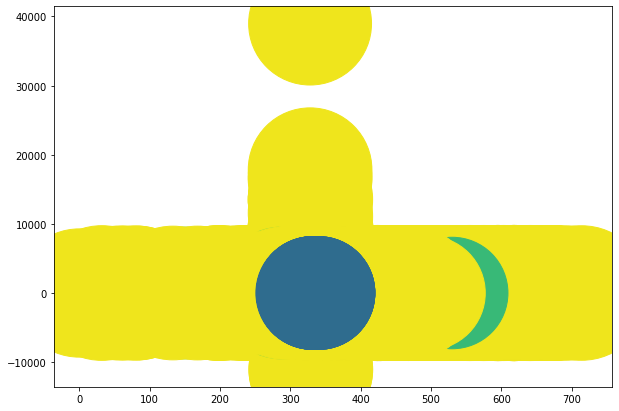

In [ ]:
#implementing K mean clsutering

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df)
# plotting of K means graphe:

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))  
plt.scatter(df['Quantity'], df['UnitPrice'],df['CustomerID'],df['Country'])
plt.show()



In [ ]:
#implementation agglomerative clustering

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  

cluster.fit(df)
cluster.predict(df)

# plotting:

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))  
plt.scatter(df['Quantity'], df['UnitPrice'],df['CustomerID'],df['Country'], c=cluster.labels_)


NameError: ignored